In [1]:
## installing dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("/Users/zeelpatel/Desktop/Ineuron/Restaurant\ Rating\ Prediction/notebook/data/cleaned_zomato_data.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/zeelpatel/Desktop/Ineuron/Restaurant\\ Rating\\ Prediction/notebook/data/cleaned_zomato_data.csv'

In [3]:
data.shape

(51717, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
data=data.drop(columns=['url','address','name','phone','menu_item','reviews_list'],axis=1)

In [6]:
data.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [7]:
data.isnull().sum()

online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
data.rename(columns={'listed_in(type)':'listed_type','listed_in(city)':'city'},inplace=True)

In [9]:
data = data.dropna(axis = 0, how='any', subset=['location','rest_type','cuisines', 'approx_cost(for two people)'])

In [10]:
data['rate']=data['rate'].str.replace('/5','')

In [11]:
data['rate']=data['rate'].str.replace('NEW','')

In [12]:
data['rate']=data['rate'].str.replace('-','')

In [19]:
data['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '', '2.9', '3.5', 0,
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [18]:
data['rate']=data['rate'].fillna(0)

In [23]:
data.isnull().sum()

online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_type                    0
city                           0
dtype: int64

In [22]:
data['dish_liked'].fillna('anything', inplace=True)

In [24]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].str.replace(',', '').astype(int)

In [27]:
data.rename(columns={'listed_type': 'restro type'}, inplace=True)
data.rename(columns={'rest_type': 'restrofacility'}, inplace=True)
data.rename(columns={'city': 'outlet location'}, inplace=True)
data.rename(columns={'approx_cost(for two people)': 'cost for two'}, inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51148 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   online_order     51148 non-null  object
 1   book_table       51148 non-null  object
 2   rate             51148 non-null  object
 3   votes            51148 non-null  int64 
 4   location         51148 non-null  object
 5   restrofacility   51148 non-null  object
 6   dish_liked       51148 non-null  object
 7   cuisines         51148 non-null  object
 8   cost for two     51148 non-null  int64 
 9   restro type      51148 non-null  object
 10  outlet location  51148 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.7+ MB


In [29]:
data.select_dtypes(include = 'object')

,online_order,book_table,rate,location,restrofacility,dish_liked,cuisines,restro type,outlet location
0,Yes,Yes,4.1,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",Buffet,Banashankari
1,Yes,No,4.1,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",Buffet,Banashankari
2,Yes,No,3.8,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",Buffet,Banashankari
3,No,No,3.7,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",Buffet,Banashankari
4,No,No,3.8,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...
51712,No,No,3.6,Whitefield,Bar,anything,Continental,Pubs and bars,Whitefield
51713,No,No,0,Whitefield,Bar,anything,Finger Food,Pubs and bars,Whitefield
51714,No,No,0,Whitefield,Bar,anything,Finger Food,Pubs and bars,Whitefield
51715,No,Yes,4.3,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,Pubs and bars,Whitefield


Delivery              25653
Dine-out              17583
Desserts               3559
Cafes                  1703
Drinks & nightlife     1091
Buffet                  871
Pubs and bars           688
Name: restro type, dtype: int64

In [38]:
categorical_columns=data.select_dtypes(include='object').columns

In [39]:
categorical_columns

Index(['online_order', 'book_table', 'location', 'restrofacility',
       'dish_liked', 'cuisines', 'restro type', 'outlet location'],
      dtype='object')

In [37]:
data['rate']=pd.to_numeric(data['rate'])

In [41]:
data[categorical_columns]

,online_order,book_table,location,restrofacility,dish_liked,cuisines,restro type,outlet location
0,Yes,Yes,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",Buffet,Banashankari
1,Yes,No,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",Buffet,Banashankari
2,Yes,No,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",Buffet,Banashankari
3,No,No,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",Buffet,Banashankari
4,No,No,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",Buffet,Banashankari
...,...,...,...,...,...,...,...,...
51712,No,No,Whitefield,Bar,anything,Continental,Pubs and bars,Whitefield
51713,No,No,Whitefield,Bar,anything,Finger Food,Pubs and bars,Whitefield
51714,No,No,Whitefield,Bar,anything,Finger Food,Pubs and bars,Whitefield
51715,No,Yes,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,Pubs and bars,Whitefield


In [42]:
for cols in categorical_columns:
    unique_values = data[cols].unique()
    unique_count = len(unique_values)
    print( f'Total Unique value {cols}',unique_count)
    print( f'unique values in {cols}: {unique_values}')
    print('-----------------')

Total Unique value online_order 2
unique values in online_order: ['Yes' 'No']
-----------------
Total Unique value book_table 2
unique values in book_table: ['Yes' 'No']
-----------------
Total Unique value location 93
unique values in location: ['Banashankari' 'Basavanagudi' 'Mysore Road' 'Jayanagar'
 'Kumaraswamy Layout' 'Rajarajeshwari Nagar' 'Vijay Nagar' 'Uttarahalli'
 'JP Nagar' 'South Bangalore' 'City Market' 'Nagarbhavi'
 'Bannerghatta Road' 'BTM' 'Kanakapura Road' 'Bommanahalli'
 'CV Raman Nagar' 'Electronic City' 'HSR' 'Marathahalli' 'Wilson Garden'
 'Shanti Nagar' 'Koramangala 5th Block' 'Koramangala 8th Block'
 'Richmond Road' 'Koramangala 7th Block' 'Jalahalli'
 'Koramangala 4th Block' 'Bellandur' 'Sarjapur Road' 'Whitefield'
 'East Bangalore' 'Old Airport Road' 'Indiranagar' 'Koramangala 1st Block'
 'Frazer Town' 'RT Nagar' 'MG Road' 'Brigade Road' 'Lavelle Road'
 'Church Street' 'Ulsoor' 'Residency Road' 'Shivajinagar' 'Infantry Road'
 'St. Marks Road' 'Cunningham Road' 

In [44]:
data['online_order']=data['online_order'].replace({'Yes':1,'No':0})

In [45]:
data['book_table']=data['book_table'].replace({'Yes':1,'No':0})

In [47]:
# we should not have mre than 7-8 categories , so in this case I will take the cut off as 1000
data['restrofacility'].value_counts()

Quick Bites                   19046
Casual Dining                 10273
Cafe                           3687
Delivery                       2578
Dessert Parlor                 2245
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: restrofacility, Length: 93, dtype: int64

In [50]:
#create a mask for resturant types which have less than 1000 count
rest_types_others= data['restrofacility'].value_counts()<1000
rest_type_less_than_1000 = data['restrofacility'].value_counts()[rest_types_others]
rest_type_less_than_1000

Beverage Shop                 865
Bar                           686
Food Court                    619
Sweet Shop                    468
Bar, Casual Dining            415
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: restrofacility, Length: 85, dtype: int64

In [51]:
def club_rest_type(value):
    if (value in rest_type_less_than_1000):
        return 'other'
    else:
        return value

In [54]:
data['restrofacility']= data['restrofacility'].apply(club_rest_type)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51148 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   online_order     51148 non-null  int64  
 1   book_table       51148 non-null  int64  
 2   rate             48878 non-null  float64
 3   votes            51148 non-null  int64  
 4   location         51148 non-null  object 
 5   restrofacility   51148 non-null  object 
 6   dish_liked       51148 non-null  object 
 7   cuisines         51148 non-null  object 
 8   cost for two     51148 non-null  int64  
 9   restro type      51148 non-null  object 
 10  outlet location  51148 non-null  object 
 11  =restrofacility  51148 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 5.1+ MB


In [57]:
data.drop(columns='=restrofacility',inplace=True)

In [58]:
data['location'].value_counts()

BTM                      5071
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2109
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [59]:
location_less_than_1000_mask = data['location'].value_counts()<1000
location_less_than_1000= data['location'].value_counts()[location_less_than_1000_mask]

In [60]:
def location_clubbing(value):
    if (value in location_less_than_1000):
        return 'other'
    else:
        return value

In [61]:
data['location'] = data['location'].apply(location_clubbing)

In [62]:
data['cuisines'].value_counts()

North Indian                                 2858
North Indian, Chinese                        2355
South Indian                                 1822
Biryani                                       906
Bakery, Desserts                              899
                                             ... 
Beverages, Burger                               1
North Indian, Mughlai, Lucknowi                 1
Continental, Thai, North Indian, Chinese        1
North Indian, Bengali, Chinese, Beverages       1
North Indian, Chinese, Arabian, Momos           1
Name: cuisines, Length: 2704, dtype: int64

In [66]:
cluster_lessthan_300 = data['cuisines'].value_counts()<300
cuisines_lessthan_300= data['cuisines'].value_counts()[cluster_lessthan_300]

In [67]:
def cuisine_clubbing(value):
    if (value in cuisines_lessthan_300):
        return 'other'
    else:
        return value

In [68]:
data['cuisines']= data['cuisines'].apply(cuisine_clubbing)

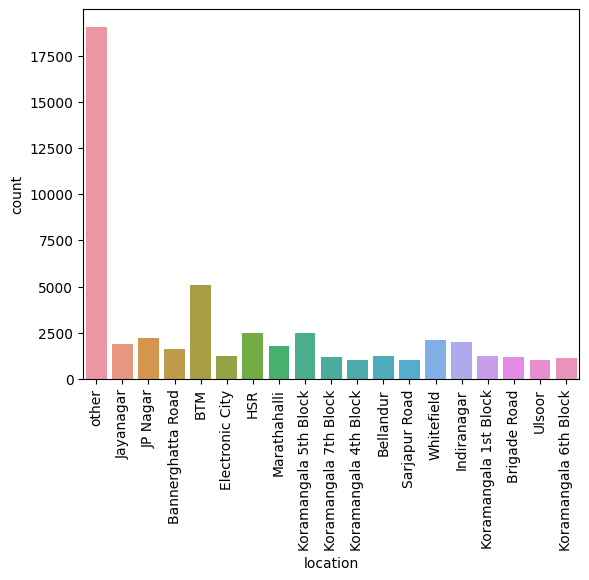

In [70]:
sns.countplot(data, x= 'location')
plt.xticks(rotation=90)
plt.show()

In [71]:
for cols in categorical_columns:
    unique_values = data[cols].unique()
    unique_count = len(unique_values)
    print( f'Total Unique value {cols}',unique_count)
    print( f'unique values in {cols}: {unique_values}')
    print('-----------------')

Total Unique value online_order 2
unique values in online_order: [1 0]
-----------------
Total Unique value book_table 2
unique values in book_table: [1 0]
-----------------
Total Unique value location 19
unique values in location: ['other' 'Jayanagar' 'JP Nagar' 'Bannerghatta Road' 'BTM'
 'Electronic City' 'HSR' 'Marathahalli' 'Koramangala 5th Block'
 'Koramangala 7th Block' 'Koramangala 4th Block' 'Bellandur'
 'Sarjapur Road' 'Whitefield' 'Indiranagar' 'Koramangala 1st Block'
 'Brigade Road' 'Ulsoor' 'Koramangala 6th Block']
-----------------
Total Unique value restrofacility 9
unique values in restrofacility: ['Casual Dining' 'other' 'Quick Bites' 'Cafe' 'Delivery' 'Dessert Parlor'
 'Bakery' 'Takeaway, Delivery' 'Casual Dining, Bar']
-----------------
Total Unique value dish_liked 5242
unique values in dish_liked: ['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup'
 'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka,

In [72]:
data['dish_liked'].value_counts()

anything                                                                                              27713
Biryani                                                                                                 181
Chicken Biryani                                                                                          73
Friendly Staff                                                                                           69
Waffles                                                                                                  68
                                                                                                      ...  
Coffee, Chicken Sandwich, Brownie, Hot Chocolate, Cappuccino, Corn Sandwich                               1
English Breakfast, Waffles, Chicken Sandwich, Pancakes, Pork Sausage, Eggs Benedict, Hot Chocolate        1
Butter Chicken, Tandoori Chicken, Rolls, Chicken Masala, Chicken Tikka, Roti                              1
Pizza, Seafood Pasta, Panna 

In [73]:
data=data.drop(columns='dish_liked',axis=1)

In [75]:
categorical_columns=data.select_dtypes(include='object')
for cols in categorical_columns:
    unique_values = data[cols].unique()
    unique_count = len(unique_values)
    print( f'Total Unique value {cols}',unique_count)
    print( f'unique values in {cols}: {unique_values}')
    print('-----------------')

Total Unique value location 19
unique values in location: ['other' 'Jayanagar' 'JP Nagar' 'Bannerghatta Road' 'BTM'
 'Electronic City' 'HSR' 'Marathahalli' 'Koramangala 5th Block'
 'Koramangala 7th Block' 'Koramangala 4th Block' 'Bellandur'
 'Sarjapur Road' 'Whitefield' 'Indiranagar' 'Koramangala 1st Block'
 'Brigade Road' 'Ulsoor' 'Koramangala 6th Block']
-----------------
Total Unique value restrofacility 9
unique values in restrofacility: ['Casual Dining' 'other' 'Quick Bites' 'Cafe' 'Delivery' 'Dessert Parlor'
 'Bakery' 'Takeaway, Delivery' 'Casual Dining, Bar']
-----------------
Total Unique value cuisines 20
unique values in cuisines: ['other' 'South Indian, North Indian' 'North Indian' 'Cafe'
 'Bakery, Desserts' 'Biryani' 'South Indian' 'North Indian, Chinese'
 'Ice Cream, Desserts' 'Chinese' 'Bakery' 'Fast Food'
 'Mithai, Street Food' 'Desserts' 'South Indian, North Indian, Chinese'
 'Chinese, North Indian' 'Desserts, Ice Cream'
 'North Indian, Chinese, Biryani' 'North Indian, 

In [76]:
data.drop_duplicates(inplace=True)

In [77]:
data.shape

(49126, 10)

In [78]:
data.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'location',
       'restrofacility', 'cuisines', 'cost for two', 'restro type',
       'outlet location'],
      dtype='object')

In [79]:
data.reset_index(drop=True,inplace=True)

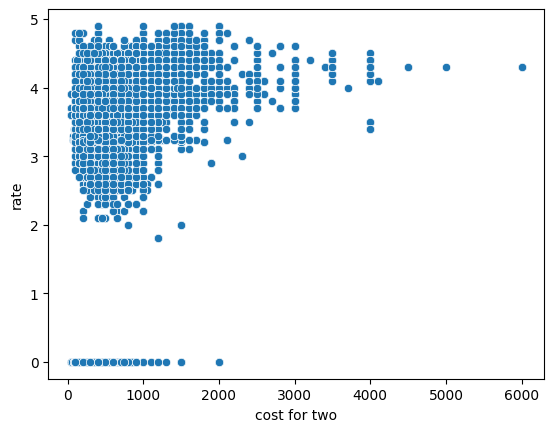

In [90]:
sns.scatterplot(data=data,x=data['cost for two'],y=data['rate'])
plt.show()

In [84]:
data['rate']=data['rate'].replace('0',np.mean(data['rate']))

In [89]:
data['rate'].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       3.23238773, 2.9       , 3.5       , 0.        , 2.6       ,
       3.4       , 4.5       , 2.5       , 2.7       , 4.7       ,
       2.4       , 2.2       , 2.3       , 4.8       , 4.9       ,
       2.1       , 2.        , 1.8       ])

In [88]:
data['rate'].fillna(data['rate'].mean(),inplace=True)

In [91]:
data.isnull().sum()

online_order       0
book_table         0
rate               0
votes              0
location           0
restrofacility     0
cuisines           0
cost for two       0
restro type        0
outlet location    0
dtype: int64

In [92]:
data.to_csv('cleaned_zomato_data.csv')